# INDENG 142 - Final Project

Grace Jung, Vijay Baliga, Nicholas Solis, Robinson Kao, David Ko

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import dataset excel file as a dataframe

In [2]:
df = pd.read_csv(r"Data Science Jobs Salaries.csv")

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Data Preprocessing

## drop unnecessary columns

In [4]:
df.drop(columns=['salary_currency', 'salary'], inplace=True)

In [5]:
df = df.dropna()

## one-hot encode categorical variables

In [6]:
df = pd.get_dummies(df)

In [7]:
for col in df.columns:
    df.rename(columns={col : '_'.join(col.split())}, inplace=True)
df.columns

Index(['salary_in_usd', 'remote_ratio', 'work_year_2020', 'work_year_2021e',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       ...
       'company_location_RU', 'company_location_SG', 'company_location_SI',
       'company_location_TR', 'company_location_UA', 'company_location_US',
       'company_location_VN', 'company_size_L', 'company_size_M',
       'company_size_S'],
      dtype='object', length=144)

## Create n-1 columns for categorical variables to prevent the dummy variable trap. Drop 1 of each.

In [8]:
df.drop(columns=['work_year_2020', 'experience_level_EN', 'employment_type_CT', 'job_title_3D_Computer_Vision_Researcher', 
'employee_residence_AE', 'company_location_AE', 'company_size_L'], inplace=True)

## Process DataFrame into more consistent, clear categorical variables.

In [9]:
df

,salary_in_usd,remote_ratio,work_year_2021e,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI_Scientist,...,company_location_PT,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,64369,50,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,68428,100,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,85000,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,230000,50,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,125000,100,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,412000,100,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
241,151000,100,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
242,105000,100,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
243,100000,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# Unique values of each column
print('COLUMN NULL COUNT')
column_types = {}
for col in df.columns:
    # print(i)
    # print(df[i].unique())
    column_types[col] = type(df[col][0])
    null_count = sum(df[col].isna())
    print(col + ':', null_count)

    # print('-----')

print('\nCOLUMN DATA TYPE')
for col, type in column_types.items():
    print(col + ':', type)

COLUMN NULL COUNT
salary_in_usd: 0
remote_ratio: 0
work_year_2021e: 0
experience_level_EX: 0
experience_level_MI: 0
experience_level_SE: 0
employment_type_FL: 0
employment_type_FT: 0
employment_type_PT: 0
job_title_AI_Scientist: 0
job_title_Applied_Data_Scientist: 0
job_title_Applied_Machine_Learning_Scientist: 0
job_title_BI_Data_Analyst: 0
job_title_Big_Data_Architect: 0
job_title_Big_Data_Engineer: 0
job_title_Business_Data_Analyst: 0
job_title_Cloud_Data_Engineer: 0
job_title_Computer_Vision_Engineer: 0
job_title_Computer_Vision_Software_Engineer: 0
job_title_Data_Analyst: 0
job_title_Data_Analytics_Engineer: 0
job_title_Data_Analytics_Manager: 0
job_title_Data_Architect: 0
job_title_Data_Engineer: 0
job_title_Data_Engineering_Manager: 0
job_title_Data_Science_Consultant: 0
job_title_Data_Science_Engineer: 0
job_title_Data_Science_Manager: 0
job_title_Data_Scientist: 0
job_title_Data_Specialist: 0
job_title_Director_of_Data_Engineering: 0
job_title_Director_of_Data_Science: 0
job_t

## Split dataset into train and test sets.

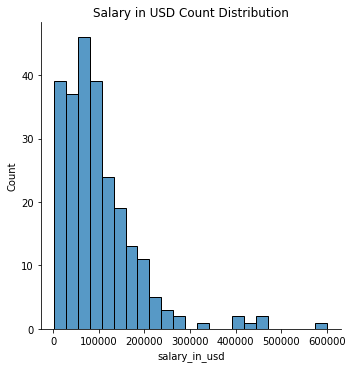

In [11]:
sns.displot(df, x='salary_in_usd')
plt.title('Salary in USD Count Distribution')
plt.show();

In [12]:
# df['log_salary_in_usd'] = np.log(df['salary_in_usd'].values)
# sns.displot(df, x='log_salary_in_usd')
# plt.title('Log Salary in USD Count Distribution');

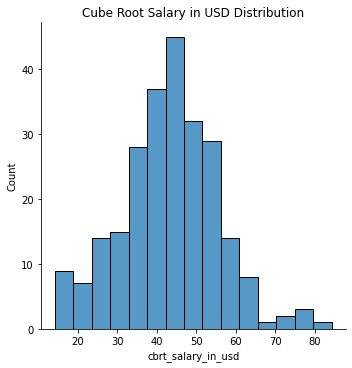

In [13]:
df['cbrt_salary_in_usd'] = np.array(df['salary_in_usd'].values)**(1/3)  # Cube Root
sns.displot(data=df, x='cbrt_salary_in_usd')
plt.title('Cube Root Salary in USD Distribution')
plt.show();

In [14]:
# train test split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=88)
df_train_y_actual = df_train['cbrt_salary_in_usd']
df_test_y_actual = df_test['cbrt_salary_in_usd']
df_train.shape, df_test.shape

((171, 138), (74, 138))

In [15]:
# target_column = 'log_salary_in_usd'
target_column = 'cbrt_salary_in_usd'
feature_columns = [col for col in df_train.columns if col != target_column]
all_features = ' + '.join(feature_columns)
all_features
linreg = smf.ols(formula = target_column + ' ~ ' + all_features,
                       data = df_train).fit()
print(linreg.summary())
linreg.summary()

                            OLS Regression Results                            
Dep. Variable:     cbrt_salary_in_usd   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.09e-37
Time:                        01:04:21   Log-Likelihood:                -341.37
No. Observations:                 171   AIC:                             884.7
Df Residuals:                      70   BIC:                             1202.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cbrt_salary_in_usd   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.09e-37
Time:                        01:04:21   Log-Likelihood:                -341.37
No. Observations:                 171   AIC:                             884.7
Df Residuals:                      70   BIC:                             1202.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             21.1044      4.810      4.388      0.000      11.512      30.697
salary_in_usd                                       9.947e-05    6.4e-06     15.532      0.000    8.67e-05       0.000
remote_ratio                                          -0.0072      0.010     -0.746      0.458      -0.026       0.012
work_year_2021e                                       -0.0626      0.707     -0.089      0.930      -1.473       1.348
experience_level_EX                                    2.7895      2.897      0.963      0.339      -2.989       8.568
experience_level_MI                                    0.8204      0.860      0.954      0.343      -0.894       2.535
experience_level_SE                                    2.0696      1.071      1.932      0.057      -0.067       4.206
employment_type_FL                                    -7.3516      6.302     -1.167      0.247     -19.920       5.217
employment_type_FT                                     6.9583      4.491      1.549      0.126      -1.999      15.916
employment_type_PT                                     7.5817      5.592      1.356      0.179      -3.571      18.734
job_title_AI_Scientist                                 1.6816      2.945      0.571      0.570      -4.193       7.556
job_title_Applied_Data_Scientist                       7.3678      5.312      1.387      0.170      -3.227      17.963
job_title_Applied_Machine_Learning_Scientist          -2.9716      3.282     -0.906      0.368      -9.517       3.574
job_title_BI_Data_Analyst                              1.5084      3.069      0.491      0.625      -4.613       7.630
job_title_Big_Data_Architect                          -0.0997      3.425     -0.029      0.977      -6.931       6.732
job_title_Big_Data_Engineer                           -1.1441      2.279     -0.502      0.617      -5.690       3.402
job_title_Business_Data_Analyst                    -2.017e-11   2.29e-11     -0.882      0.381   -6.58e-11    2.54e-11
job_title_Cloud_Data_Engineer                      -1.663e-12   4.04e-12     -0.412      0.682   -9.72e-12    6.39e-12
job_title_Computer_Vision_Engineer                     0.1228      3.424      0.036      0.971      -6.706       6.951
job_title_Computer_Vision_Software_Engineer            1.0060      2.969      0.339      0.736      -4.916       6.928
job_title_Data_Analyst                                -0.4791      1.190     -0.403      0.688      -2.852       1.894
job_title_Data_Analytics_Engineer                      1.3717      2.883      0.476      0.636      -4.378       7.121
job_title_Data_Analytics_Manager                       2.0740      2.921      0.710      0.480      -3.751  

## Define OSR2

In [16]:
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [17]:
OSR2(linreg, df_train, df_test, target_column)

0.7394346635275322

## Feature Selection: Use VIF to keep good features.

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns) + 1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

## Feature Selection: Identify and eliminate high P-Value features

In [19]:
def get_formula(features, target):
    features = [f for f in features if f != target]
    sum_features = ' + '.join(features)
    formula = ' ~ '.join([target, sum_features])
    return formula

In [20]:
def filter_feature(features, model, df_train, target):
    p_values = {}
    features = [f for f in model.params.index if f != 'Intercept']

    # 
    for feat in features:
        p_values[feat] = model.pvalues.loc[feat]

    worst_feat = max(features, key=lambda f: p_values[f])

    print('WORST:', worst_feat, '-->', p_values[worst_feat])
    new_features = [f for f in features if f != worst_feat]
    
    new_model = smf.ols(formula = get_formula(new_features, target),
                        data = df_train).fit()


    return new_features, new_model, p_values[worst_feat]



In [21]:
features = df_train.columns
model = linreg
p_value = float('inf')
models = {} # (formula, model)

while p_value > 0.05:
    features, model, p_value = filter_feature(features, model, df_train, target_column)
    formula = get_formula(features, target_column)

WORST: company_location_CH --> 0.9917592810503727
WORST: job_title_Big_Data_Architect --> 0.9765611842923134
WORST: job_title_Data_Science_Consultant --> 0.978899374584294
WORST: company_location_PK --> 0.9751836220509351
WORST: company_location_CL --> 0.957280923019161
WORST: company_location_DE --> 0.9496630619778473
WORST: job_title_Computer_Vision_Engineer --> 0.937177139133903
WORST: work_year_2021e --> 0.9307019294832726
WORST: company_location_CA --> 0.9163775632788269
WORST: company_location_PL --> 0.9154613441099624
WORST: company_location_AT --> 0.9138669495937461
WORST: job_title_Research_Scientist --> 0.8906949325926343
WORST: job_title_Lead_Data_Analyst --> 0.9021539749130271
WORST: job_title_Data_Analyst --> 0.8980333768007385
WORST: company_location_PT --> 0.8149601176331617
WORST: company_location_HR --> 0.8150797190579797
WORST: job_title_Business_Data_Analyst --> 0.9202698235782161
WORST: employee_residence_HR --> 0.815079718972983
WORST: employee_residence_PH --> 0.9

In [22]:
best_features = features + ['employee_residence_RU']
print(best_features)
best_linreg = smf.ols(formula=get_formula(best_features, target_column),
                 data=df_train).fit()
print(best_linreg.summary())

['salary_in_usd', 'experience_level_EX', 'experience_level_SE', 'employment_type_FT', 'employment_type_PT', 'job_title_Data_Science_Manager', 'job_title_Principal_Data_Engineer', 'job_title_Product_Data_Analyst', 'employee_residence_BE', 'employee_residence_BR', 'employee_residence_CA', 'employee_residence_DE', 'employee_residence_IN', 'employee_residence_JE', 'employee_residence_JP', 'employee_residence_KE', 'employee_residence_MX', 'employee_residence_NL', 'employee_residence_PK', 'employee_residence_SG', 'employee_residence_TR', 'employee_residence_UA', 'employee_residence_US', 'company_location_BE', 'company_location_GB', 'company_location_IL', 'company_location_IN', 'company_location_JP', 'company_location_KE', 'company_location_MX', 'company_location_NZ', 'company_location_SG', 'company_location_TR', 'company_location_UA', 'company_location_US', 'company_location_VN', 'employee_residence_RU']
                            OLS Regression Results                            
Dep. Vari

In [23]:
OSR2(best_linreg, df_train, df_test, target_column)

0.8035179130896895

## remove 0 coefficient and NaN p-value features

In [24]:
# best_features.remove('company_location_LU')
best_features.remove('company_location_NZ')
best_features.remove('company_location_SG')
best_linreg2 = smf.ols(formula=get_formula(best_features, target_column),
                 data=df_train).fit()
print(best_linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:     cbrt_salary_in_usd   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 08 May 2023   Prob (F-statistic):           3.01e-90
Time:                        01:04:36   Log-Likelihood:                -391.77
No. Observations:                 171   AIC:                             841.5
Df Residuals:                     142   BIC:                             932.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [25]:
OSR2(best_linreg2, df_train, df_test, target_column)

0.8035179130896896

## Predict test set and compare to results

In [26]:
y_pred = best_linreg2.predict(df_test)
# y_pred = np.rint(y_pred).astype(int)
y_pred

201    52.284403
14     45.656034
12     42.383180
226    42.813622
140    48.904506
         ...    
154    43.422710
18     41.290900
74     28.740143
138    47.325491
121    44.656114
Length: 74, dtype: float64

In [27]:
df_test

,salary_in_usd,remote_ratio,work_year_2021e,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI_Scientist,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S,cbrt_salary_in_usd
201,140000,100,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,51.924941
14,103000,100,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,46.875481
12,75966,100,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,42.351918
226,75000,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,42.171633
140,135000,100,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,51.299278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,81000,50,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,43.267487
18,60000,100,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,39.148676
74,28475,100,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,30.536640
138,96357,50,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,45.845258


## predict our own entries (randomized)

read csv again with new dataframe, dropping unnecessary features

In [28]:
df_copy = pd.read_csv(r"Data Science Jobs Salaries.csv").drop(columns=['salary_currency', 'salary_in_usd', 'salary'])
df_copy


,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,DE,50,DE,L
1,2020,SE,FT,Data Scientist,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,RU,0,RU,M
3,2021e,EX,FT,Head of Data,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,US,100,US,S
...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,US,100,US,L
242,2020,EN,FT,Data Scientist,US,100,US,S
243,2020,EN,CT,Business Data Analyst,US,100,US,L


get unique values of each of our features to randomize

In [29]:
possible_WY = df_copy['work_year'].unique()
possible_ET = df_copy['employment_type'].unique()
possible_ER = df_copy['employee_residence'].unique()
possible_RR = df_copy['remote_ratio'].unique()
possible_CL = df_copy['company_location'].unique()
possible_CS = df_copy['company_size'].unique()

make an empty dataframe to add our imaginary data scientists to

In [30]:
random_df_copy = df_copy.copy()
random_df_copy = random_df_copy[0:0]
random_df_copy

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size


create 200 imaginary data scientists by randomizing possible values from our raw dataset

In [31]:
for i in range(200):

    EN_JT_index = random.randint(0, len(df_copy.index)-1)

    random_WY = random.choice(possible_WY)
    random_EL = df_copy.iloc[EN_JT_index]['experience_level']
    random_ET = random.choice(possible_ET)
    random_JT = df_copy.iloc[EN_JT_index]['job_title']
    random_ER = random.choice(possible_ER)
    random_RR = random.choice(possible_RR)
    random_CL = random.choice(possible_CL)
    random_CS = random.choice(possible_CS)

    random_df_copy.loc[len(random_df_copy.index)] = [random_WY, random_EL, random_ET, random_JT, 
                                                     random_ER, random_RR, random_CL, random_CS]

random_df_copy

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FL,Data Scientist,UA,50,SI,L
1,2021e,SE,FT,Machine Learning Scientist,US,100,ES,L
2,2020,EN,CT,Data Science Consultant,TR,0,CN,L
3,2020,MI,PT,Data Engineer,JP,0,IR,M
4,2020,MI,PT,Data Analyst,SG,0,ES,M
...,...,...,...,...,...,...,...,...
195,2021e,SE,FL,Data Science Manager,GR,50,IL,L
196,2020,SE,CT,Data Engineering Manager,MT,50,RU,L
197,2020,SE,PT,Data Scientist,US,50,CH,M
198,2020,EN,CT,Data Scientist,DK,100,NZ,S


create dummy variables for our features to use in making predictions

In [32]:
random_df_copy = pd.get_dummies(random_df_copy)
random_df_copy

,remote_ratio,work_year_2020,work_year_2021e,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,50,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,100,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
196,50,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
197,50,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
198,100,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


rename columns to include _ in existing ones with spaces (to match the features in the model)

In [33]:
for col in random_df_copy.columns:
    random_df_copy.rename(columns={col : '_'.join(col.split())}, inplace=True)

Add 0 columns for features which weren't randomly chosen from possible values. If this happens, the dummy variables for those possible categories are not in our testing set and cannot work with the model as intended. 

In [34]:
for c in df.columns:
    if c not in random_df_copy.columns:
        random_df_copy[c] = 0

remove unneeded columns to match model perfectly

In [35]:
to_drop = ['work_year_2020', 'experience_level_EN', 'employment_type_CT', 'job_title_3D_Computer_Vision_Researcher', 
'employee_residence_AE', 'company_location_AE', 'company_size_L', 'log_salary_in_usd', 'sqrt_salary_in_usd', 'cbrt_salary_in_usd']
for c in to_drop:
    if c in random_df_copy.columns:
        random_df_copy.drop(columns=[c], inplace=True)

print the processed, randomized dataframe of 200 data scientist

In [36]:
random_df_copy

,remote_ratio,work_year_2021e,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI_Scientist,job_title_Applied_Data_Scientist,...,company_location_US,company_location_VN,company_size_M,company_size_S,salary_in_usd,job_title_Big_Data_Architect,job_title_Machine_Learning_Infrastructure_Engineer,job_title_Marketing_Data_Analyst,job_title_Principal_Data_Engineer,job_title_Staff_Data_Scientist
0,50,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,50,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,50,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
198,100,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


make predictions for our 200 random data scientist's salaries

In [37]:
y_pred_rand = best_linreg2.predict(random_df_copy)
# y_pred_rand = np.rint(y_pred_rand).astype(int)
y_pred_rand

0      19.438706
1      35.934362
2      20.831496
3      30.711979
4      32.431146
         ...    
195    32.985860
196    26.061482
197    34.859494
198    23.189158
199    25.083323
Length: 200, dtype: float64

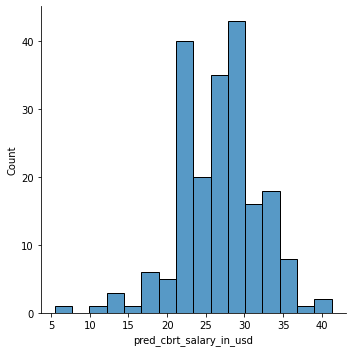

In [38]:
random_df_copy['pred_cbrt_salary_in_usd'] = y_pred_rand
sns.displot(data=random_df_copy, x = 'pred_cbrt_salary_in_usd')
plt.show();

In [39]:
# random_df_copy['pred_salary'] = y_pred_rand
negative_predictions = random_df_copy[random_df_copy['pred_cbrt_salary_in_usd'] < 0]
display(negative_predictions)

,remote_ratio,work_year_2021e,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI_Scientist,job_title_Applied_Data_Scientist,...,company_location_VN,company_size_M,company_size_S,salary_in_usd,job_title_Big_Data_Architect,job_title_Machine_Learning_Infrastructure_Engineer,job_title_Marketing_Data_Analyst,job_title_Principal_Data_Engineer,job_title_Staff_Data_Scientist,pred_cbrt_salary_in_usd


In [40]:
#plt.plot(negative_predictions);


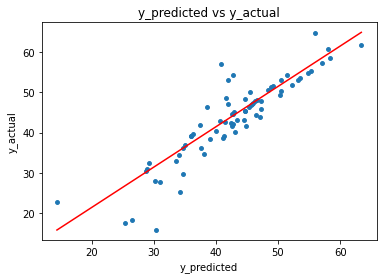

In [41]:
x_min = np.min(y_pred)
x_max = np.max(y_pred)
y_min = np.min(df_test_y_actual)
y_max = np.max(df_test_y_actual)

x = np.arange(x_min, x_max + 1)
y = np.arange(y_min, y_max + 1)


plt.scatter(x=y_pred, y=df_test_y_actual, s=15)
plt.plot(x, y, color='red')  # y = x
plt.xlabel('y_predicted')
plt.ylabel('y_actual')
plt.title('y_predicted vs y_actual')
plt.show();

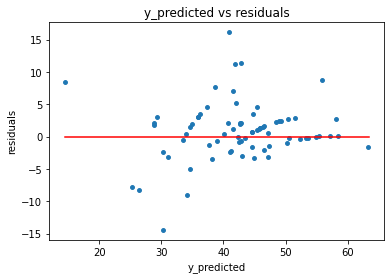

In [42]:
residuals = df_test_y_actual - y_pred

x_min = np.min(y_pred)
x_max = np.max(y_pred)
y_min = np.min(residuals)
y_max = np.max(residuals)

x = np.arange(x_min, x_max + 1)
y = np.zeros(len(x))

plt.scatter(x=y_pred, y=residuals, s=15)
plt.plot(x, y, color='red')  # y = x
plt.xlabel('y_predicted')
plt.ylabel('residuals')
plt.title('y_predicted vs residuals')
plt.show();

In [43]:
error = df_test_y_actual - y_pred